In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/IdLookupTable.csv
/kaggle/input/SampleSubmission.csv
/kaggle/input/test/test.csv
/kaggle/input/training/training.csv


In [2]:
#Importing the dependencies
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
#Reading the Lookup Table
IdLookupTable = pd.read_csv('/kaggle/input/IdLookupTable.csv')
IdLookupTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


In [4]:
IdLookupTable.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [5]:
#Reading the training dataset
training = pd.read_csv('/kaggle/input/training/training.csv')
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [6]:
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [7]:
test = pd.read_csv('/kaggle/input/test/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [8]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [9]:
#There are lot of null values in the training dataset. Let's drop all the rows which have null values. 
training = training.dropna()

In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [11]:
training.shape, type(training)

((2140, 31), pandas.core.frame.DataFrame)

In [12]:
# Let us seperate images and keypoints seperately for the train dataset

#Writing a function to seperate the images from the training data
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

#Writing a function to seperate the keypoints from the training data
def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features


clean_train_images =load_images(training)
print("Shape of clean_train_images: {}".format(np.shape(clean_train_images)))

clean_train_keypoints = load_keypoints(training)
print("Shape of clean_train_keypoints: {}".format(np.shape(clean_train_keypoints)))

test_images = load_images(test)
print("Shape of test_images: {}".format(np.shape(test_images)))

Shape of clean_train_images: (2140, 96, 96, 1)
Shape of clean_train_keypoints: (2140, 30)
Shape of test_images: (1783, 96, 96, 1)


In [13]:
#Let's create a function to plot the image
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)
    plt.title(title)

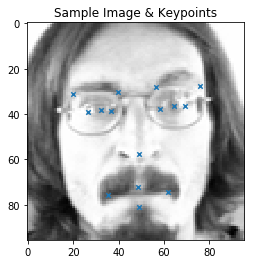

In [14]:
#Let's create a new label for images and keypoints
train_images = clean_train_images
train_keypoints = clean_train_keypoints
fig, axis = plt.subplots()
plot_sample(clean_train_images[25], clean_train_keypoints[25], axis, "Sample Image & Keypoints")

# Horizonal Flipping of Images

Shape of flipped_train_images: (2140, 96, 96, 1)
Shape of flipped_train_keypoints: (2140, 30)


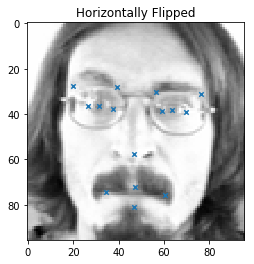

In [15]:
#Various Image Agumentation choices
sample = 25
horizontal_flip = True
rotation_augmentation = True
brightness_augmentation = True
shift_augmentation = True
random_noise_augmentation = True

#Function for Horizantal flipping of images
def left_right_flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
    return flipped_images, flipped_keypoints

if horizontal_flip:
    flipped_train_images, flipped_train_keypoints = left_right_flip(clean_train_images, clean_train_keypoints)
    print("Shape of flipped_train_images:",np.shape(flipped_train_images))
    print("Shape of flipped_train_keypoints:",np.shape(flipped_train_keypoints))
    
    #Concatenating the train images with flipped image & train keypoints with flipped train points
    train_images = np.concatenate((train_images, flipped_train_images))
    train_keypoints = np.concatenate((train_keypoints, flipped_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(flipped_train_images[sample], flipped_train_keypoints[sample], axis, "Horizontally Flipped") 

# Rotating of Images

In [16]:
#Example for converting rotated image
#img = cv2.imread('messi5.jpg',0)
#rows,cols = img.shape

#M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
#dst = cv2.warpAffine(img,M,(cols,rows))

Augmenting for angles (in degrees): 
12  -12  
Shape of rotated_train_images: (4280, 96, 96, 1)
Shape of rotated_train_keypoints:
 (4280, 30)


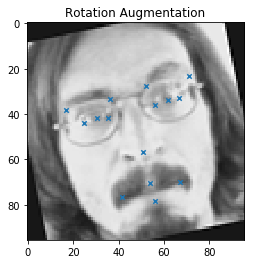

In [17]:
import cv2
from math import sin, cos, pi


rotation_angles = [12]    # Rotation angle in degrees (includes both clockwise & anti-clockwise rotations)
pixel_shifts = [12]    # Horizontal & vertical shift amount in pixels (includes shift from all 4 corners)

#Writing a function for Rotation of the Images
def rotate_augmentation(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")
    
    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            angle_rad = -angle*pi/180.     # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise directions from conventional rotation to cv2's image rotation)
            
            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
            
            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    # https://in.mathworks.com/matlabcentral/answers/93554-how-can-i-rotate-a-set-of-points-in-a-plane-by-a-certain-angle-about-an-arbitrary-point
                    rotated_keypoint[idx] = rotated_keypoint[idx]*cos(angle_rad)-rotated_keypoint[idx+1]*sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*sin(angle_rad)+rotated_keypoint[idx+1]*cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

#For more details on the transformation of the images below is the link.
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

if rotation_augmentation:
    rotated_train_images, rotated_train_keypoints = rotate_augmentation(clean_train_images, clean_train_keypoints)
    print("\nShape of rotated_train_images:",np.shape(rotated_train_images))
    print("Shape of rotated_train_keypoints:\n",np.shape(rotated_train_keypoints))
    
    #Concatenating the train images with rotated image & train keypoints with rotated train points
    train_images = np.concatenate((train_images, rotated_train_images))
    train_keypoints = np.concatenate((train_keypoints, rotated_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(rotated_train_images[sample], rotated_train_keypoints[sample], axis, "Rotation Augmentation")


# Brightness Alteration of Images

Shape of altered_brightness_train_images: (4280, 96, 96, 1)
Shape of altered_brightness_train_keypoints: (4280, 30)


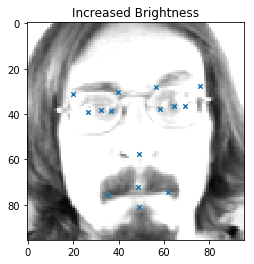

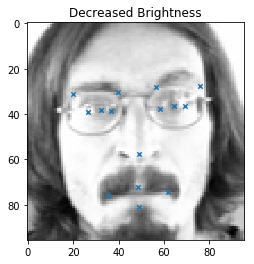

In [19]:
#Writing a function for Brightness Alteration
def alter_brightness(images, keypoints):
    altered_brightness_images = []
    inc_brightness_images = np.clip(images*1.2, 0.0, 1.0)    # Increased brightness by a factor of 1.2 & clip any values outside the range of [-1,1]
    dec_brightness_images = np.clip(images*0.6, 0.0, 1.0)    # Decreased brightness by a factor of 0.6 & clip any values outside the range of [-1,1]
    altered_brightness_images.extend(inc_brightness_images)
    altered_brightness_images.extend(dec_brightness_images)
    return altered_brightness_images, np.concatenate((keypoints, keypoints))

if brightness_augmentation:
    altered_brightness_train_images, altered_brightness_train_keypoints = alter_brightness(clean_train_images, clean_train_keypoints)
    print("Shape of altered_brightness_train_images:",np.shape(altered_brightness_train_images))
    print("Shape of altered_brightness_train_keypoints:",np.shape(altered_brightness_train_keypoints))
    
    #Concatenating the train images with brightness altered images & train keypoints with brightness altered train points
    train_images = np.concatenate((train_images, altered_brightness_train_images))
    train_keypoints = np.concatenate((train_keypoints, altered_brightness_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(altered_brightness_train_images[sample], altered_brightness_train_keypoints[sample], axis, "Increased Brightness") 
    fig, axis = plt.subplots()
    plot_sample(altered_brightness_train_images[len(altered_brightness_train_images)//2+sample], altered_brightness_train_keypoints[len(altered_brightness_train_images)//2+sample], axis, "Decreased Brightness") 

# Horizontal Left and Vertical Shift

Shape of shifted_train_images: (6350, 96, 96, 1)
Shape of shifted_train_keypoints: (6350, 30)


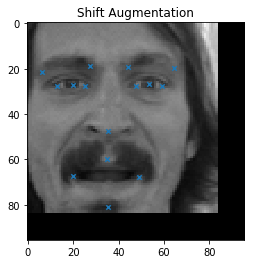

In [21]:
#Writing a function for shift the image horizontal and verical
def shift_images(images, keypoints):
    shifted_images = []
    shifted_keypoints = []
    for shift in pixel_shifts:    # Augmenting over several pixel shift values
        for (shift_x,shift_y) in [(-shift,-shift),(-shift,shift),(shift,-shift),(shift,shift)]:
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            for image, keypoint in zip(images, keypoints):
                shifted_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_keypoint = np.array([(point+shift_x) if idx%2==0 else (point+shift_y) for idx, point in enumerate(keypoint)])
                if np.all(0.0<shifted_keypoint) and np.all(shifted_keypoint<96.0):
                    shifted_images.append(shifted_image.reshape(96,96,1))
                    shifted_keypoints.append(shifted_keypoint)
    shifted_keypoints = np.clip(shifted_keypoints,0.0,96.0)
    return shifted_images, shifted_keypoints

if shift_augmentation:
    shifted_train_images, shifted_train_keypoints = shift_images(clean_train_images, clean_train_keypoints)
    print(f"Shape of shifted_train_images:",np.shape(shifted_train_images))
    print(f"Shape of shifted_train_keypoints:",np.shape(shifted_train_keypoints))
    
    train_images = np.concatenate((train_images, shifted_train_images))
    train_keypoints = np.concatenate((train_keypoints, shifted_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(shifted_train_images[sample], shifted_train_keypoints[sample], axis, "Shift Augmentation")

# Adding Noise to the images

Shape of noisy_train_images: (2140, 96, 96, 1)


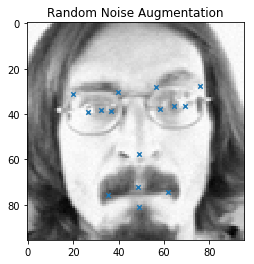

In [22]:
#Writing a function to add noise
def add_noise(images):
    noisy_images = []
    for image in images:
        noisy_image = cv2.add(image, 0.008*np.random.randn(96,96,1))    # Adding random normal noise to the input image & clip the resulting noisy image between [-1,1]
        noisy_images.append(noisy_image.reshape(96,96,1))
    return noisy_images

if random_noise_augmentation:
    noisy_train_images = add_noise(clean_train_images)
    print("Shape of noisy_train_images:",np.shape(noisy_train_images))
    
    train_images = np.concatenate((train_images, noisy_train_images))
    train_keypoints = np.concatenate((train_keypoints, clean_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(noisy_train_images[sample], clean_train_keypoints[sample], axis, "Random Noise Augmentation")

# Visualizing all the train images with keypoints

Shape of final train_images: (31960, 96, 96, 1)
Shape of final train_keypoints: (31960, 30)
Horizontal Flip Augmentation: 


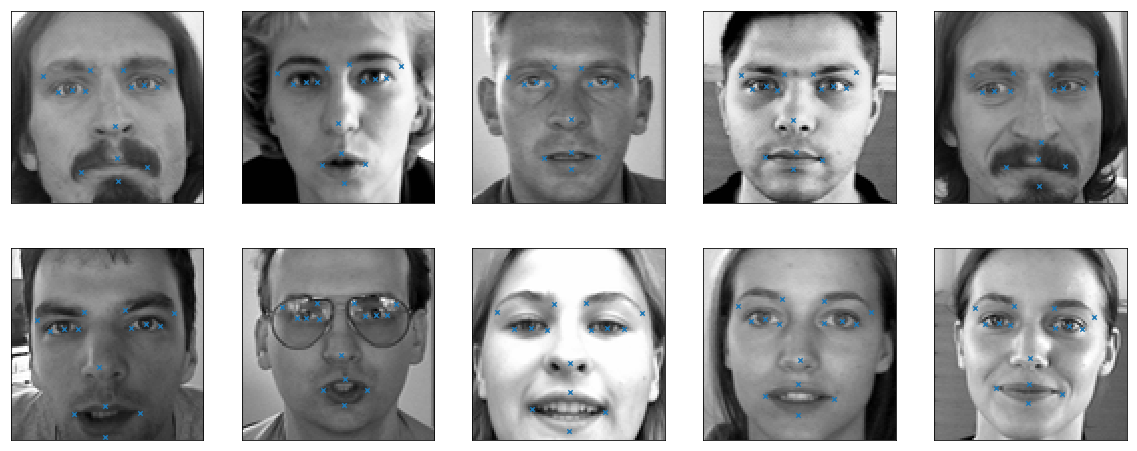

Rotation Augmentation: 


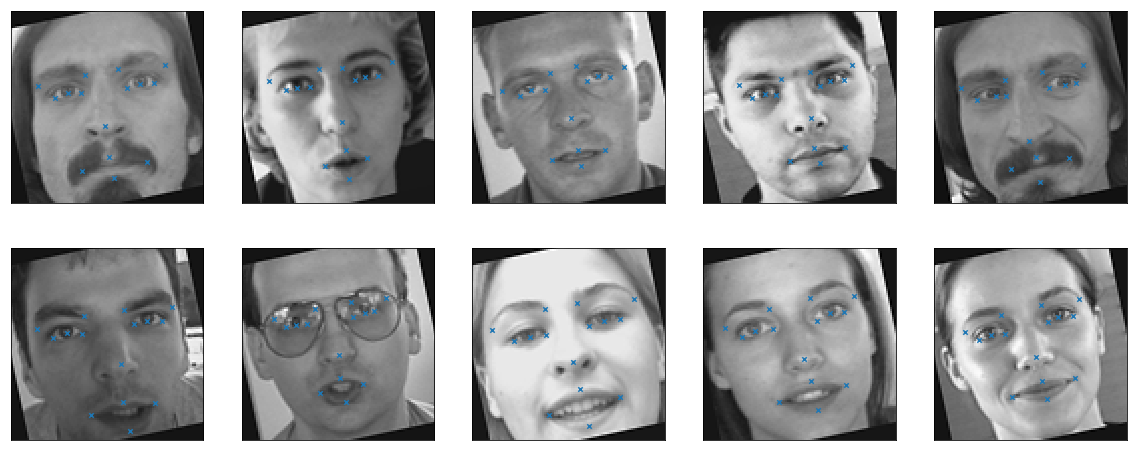

Brightness Augmentation: 


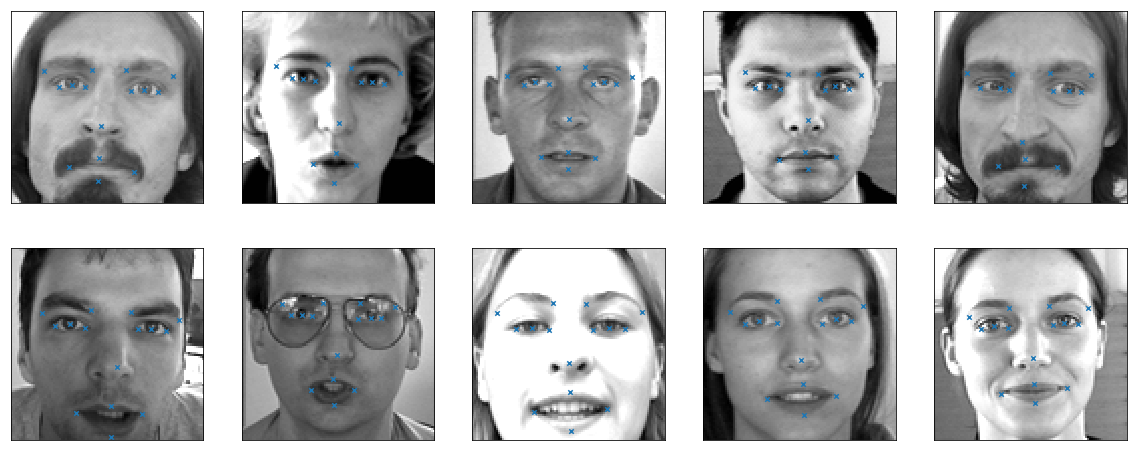

Shift Augmentation: 


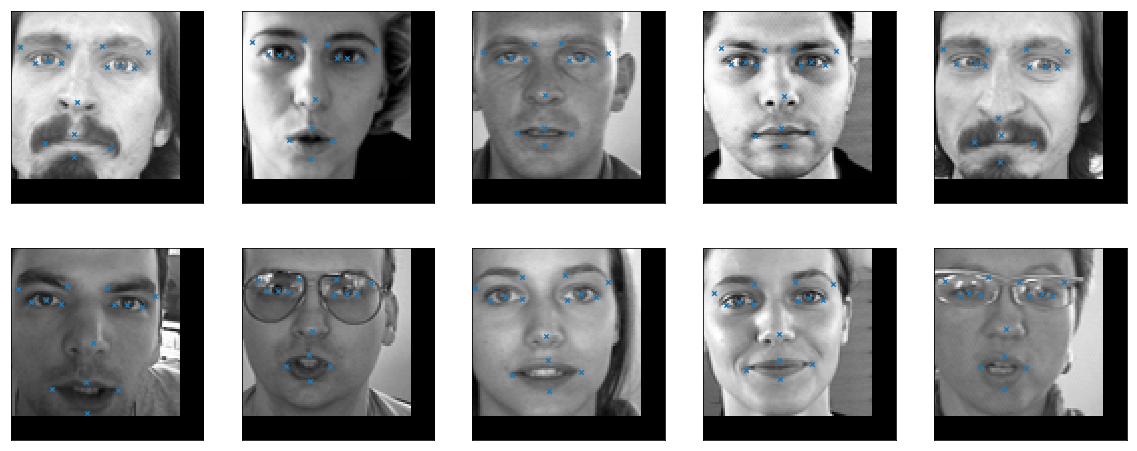

Random Noise Augmentation: 


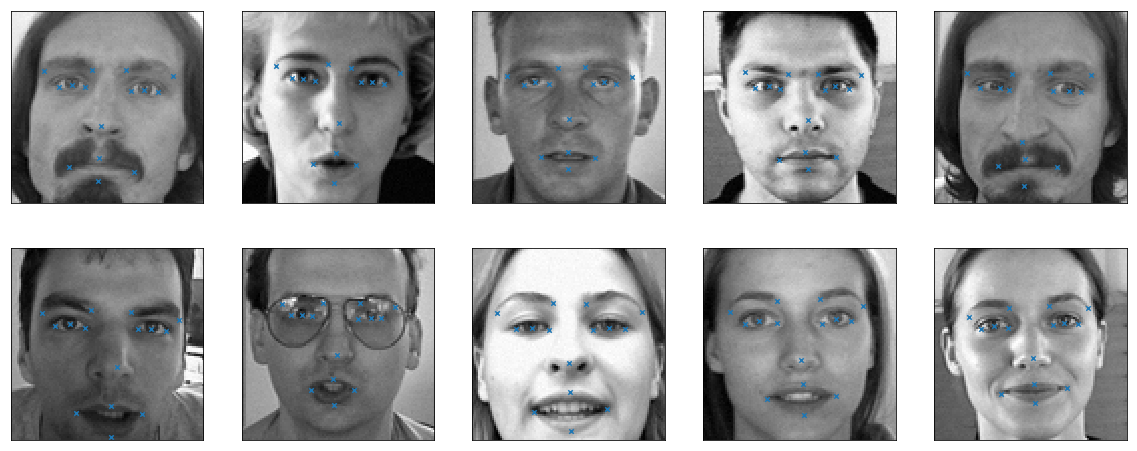

In [23]:
print("Shape of final train_images: {}".format(np.shape(train_images)))
print("Shape of final train_keypoints: {}".format(np.shape(train_keypoints)))

if horizontal_flip:
    print("Horizontal Flip Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(flipped_train_images[i], flipped_train_keypoints[i], axis, "")
    plt.show()

if rotation_augmentation:
    print("Rotation Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(rotated_train_images[i], rotated_train_keypoints[i], axis, "")
    plt.show()
    
if brightness_augmentation:
    print("Brightness Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(altered_brightness_train_images[i], altered_brightness_train_keypoints[i], axis, "")
    plt.show()

if shift_augmentation:
    print("Shift Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(shifted_train_images[i], shifted_train_keypoints[i], axis, "")
    plt.show()
    
if random_noise_augmentation:
    print("Random Noise Augmentation: ")
    fig = plt.figure(figsize=(20,8))
    for i in range(10):
        axis = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        plot_sample(noisy_train_images[i], clean_train_keypoints[i], axis, "")
    plt.show()

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
from keras import regularizers
from keras.layers.advanced_activations import ReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.1))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(ReLU())
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [25]:
from keras import optimizers
adam =optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, 
              loss='mse', 
              metrics=['accuracy'])

In [27]:
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'best_model.hdf5', monitor='val_mae', verbose=1, save_best_only=True, mode='min')
hist = model.fit(train_images, train_keypoints,epochs=100,batch_size =64, validation_split=0.20, callbacks=[checkpointer])

Train on 25568 samples, validate on 6392 samples
Epoch 1/100
25568/25568 [==============================] - 40s 2ms/step - loss: 76.4320 - accuracy: 0.5606 - val_loss: 81.0871 - val_accuracy: 0.5352
Epoch 2/100
  128/25568 [..............................] - ETA: 29s - loss: 37.8098 - accuracy: 0.6016

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_mae available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


25568/25568 [==============================] - 32s 1ms/step - loss: 31.2207 - accuracy: 0.6514 - val_loss: 22.8732 - val_accuracy: 0.7926
Epoch 3/100
25568/25568 [==============================] - 32s 1ms/step - loss: 25.3689 - accuracy: 0.6813 - val_loss: 9.1774 - val_accuracy: 0.7993
Epoch 4/100
25568/25568 [==============================] - 32s 1ms/step - loss: 21.6913 - accuracy: 0.7028 - val_loss: 11.5276 - val_accuracy: 0.7855
Epoch 5/100
25568/25568 [==============================] - 32s 1ms/step - loss: 18.3646 - accuracy: 0.7178 - val_loss: 8.6215 - val_accuracy: 0.7943
Epoch 6/100
25568/25568 [==============================] - 32s 1ms/step - loss: 15.8547 - accuracy: 0.7277 - val_loss: 6.2620 - val_accuracy: 0.8118
Epoch 7/100
25568/25568 [==============================] - 32s 1ms/step - loss: 13.8536 - accuracy: 0.7395 - val_loss: 9.5958 - val_accuracy: 0.8069
Epoch 8/100
25568/25568 [==============================] - 32s 1ms/step - loss: 12.8697 - accuracy: 0.7431 - val_los

25568/25568 [==============================] - 32s 1ms/step - loss: 4.3626 - accuracy: 0.8402 - val_loss: 1.7393 - val_accuracy: 0.8744
Epoch 58/100
25568/25568 [==============================] - 32s 1ms/step - loss: 4.2234 - accuracy: 0.8406 - val_loss: 1.4267 - val_accuracy: 0.9044
Epoch 59/100
25568/25568 [==============================] - 32s 1ms/step - loss: 4.0536 - accuracy: 0.8427 - val_loss: 1.8564 - val_accuracy: 0.9013
Epoch 60/100
25568/25568 [==============================] - 32s 1ms/step - loss: 4.0965 - accuracy: 0.8470 - val_loss: 1.4610 - val_accuracy: 0.8830
Epoch 61/100
25568/25568 [==============================] - 32s 1ms/step - loss: 4.0753 - accuracy: 0.8478 - val_loss: 1.5447 - val_accuracy: 0.8659
Epoch 62/100
25568/25568 [==============================] - 32s 1ms/step - loss: 4.0030 - accuracy: 0.8446 - val_loss: 1.4933 - val_accuracy: 0.8997
Epoch 63/100
25568/25568 [==============================] - 32s 1ms/step - loss: 3.8620 - accuracy: 0.8511 - val_loss: 

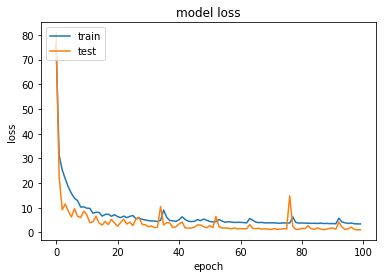

In [28]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

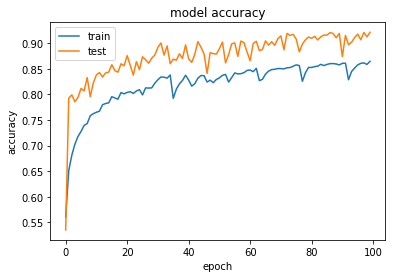

In [29]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model.save('keypoint_model.h5')

In [32]:
from keras.models import load_model 

test_preds = model.predict(test_images)

# Visualizing Test Images

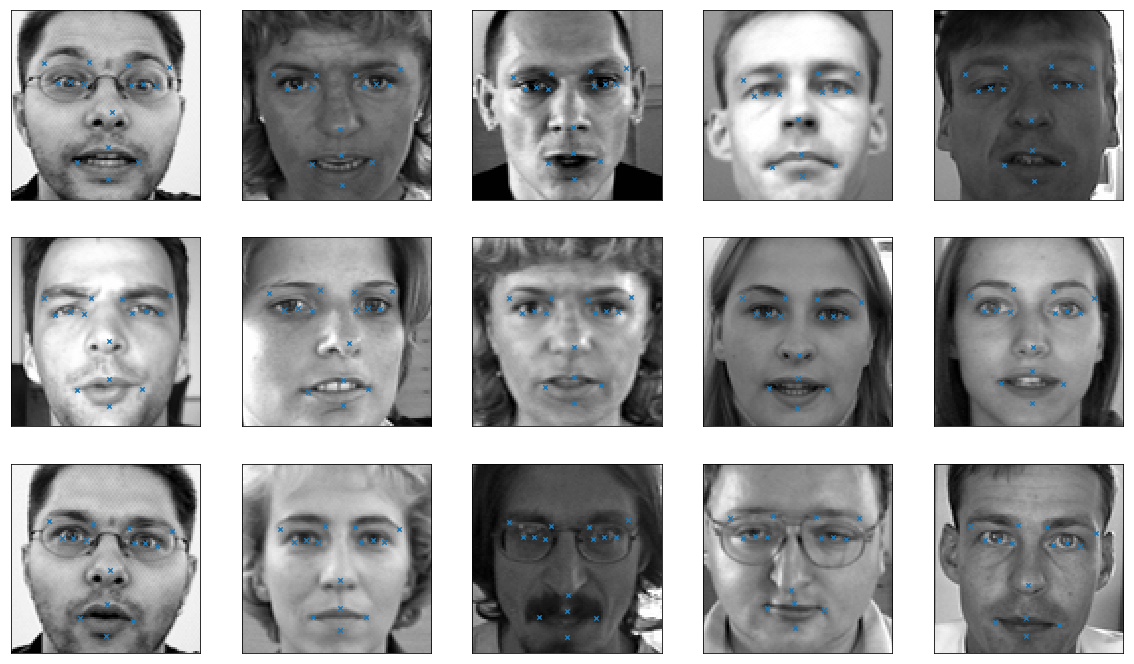

In [34]:
fig = plt.figure(figsize=(20,16))
for i in range(15):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], test_preds[i], axis, "")
plt.show()